# Fig. 2

Last updated June 2023

In [3]:
suppressPackageStartupMessages({
    library(tidyr)
    library(ggplot2)
    library(dplyr)
    library(stringr)
    library(tidyverse)
    library(RColorBrewer)
    library(ggallin)
})

source('../scripts/utils.R')

## Plot HLA allele diversity

In [2]:
results = rbind(read.csv('../data/hla_alleles/HLA_alleles_table_OneK1K.csv', row.names = 1) %>%
                            mutate(dataset = 'OneK1K'),
                         read.csv('../data/hla_alleles/HLA_alleles_table_AMP2RA.csv', row.names = 1) %>%
                            mutate(dataset = 'AMP2RA'),
                         read.csv('../data/hla_alleles/HLA_alleles_table_Smillie_ccdg.csv', row.names = 1)%>%
                            mutate(dataset = 'Smillie2019'),
                         read.csv('../data/hla_alleles/HLA_alleles_table_Smillie_Helmsley.csv', row.names = 1) %>%
                            mutate(dataset = 'Smillie2019'),
                         read.csv('../data/hla_alleles/HLA_alleles_table_Randolph.csv', row.names = 1) %>%
                            mutate(dataset = 'Randolph2021'))
results = results %>% mutate(count = ifelse(GT %in% c('0|1', '1|0'), 1, 2))

results %>% head(4)
results$Sample %>% unique() %>% length()

,Geno_ID,Sample,Allele,Gene,GT,dosage,dataset,count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,691_692,691_692,HLA_A*02:01,HLA_A,1|0,0.98,OneK1K,1
2,691_692,691_692,HLA_A*69:01,HLA_A,0|1,1.00,OneK1K,1
3,691_692,691_692,HLA_C*06:02,HLA_C,1|1,2.00,OneK1K,2
4,691_692,691_692,HLA_B*13:02,HLA_B,0|1,1.00,OneK1K,1


[1] 1146

In [3]:
# Remove duplicates (NI and flu)
results = results %>% filter(! endsWith(Sample, 'flu'))
results$Sample %>% unique() %>% length()

[1] 1073

In [4]:
results_df_agg = aggregate(results$count, 
                     by = list(allele = results$Allele, gene = results$Gene), FUN = sum)
results_df_agg %>% head(5)

,allele,gene,x
,<chr>,<chr>,<dbl>
1,HLA_A*01:01,HLA_A,377
2,HLA_A*01:02,HLA_A,1
3,HLA_A*02:01,HLA_A,599
4,HLA_A*02:02,HLA_A,3
5,HLA_A*02:05,HLA_A,12


In [5]:
top_10_per_gene = results_df_agg %>% 
    arrange(desc(x)) %>% 
    group_by(gene) %>% slice(1:10) 
top_10_per_gene %>% head(4)

allele,gene,x
<chr>,<chr>,<dbl>
HLA_A*02:01,HLA_A,599
HLA_A*01:01,HLA_A,377
HLA_A*03:01,HLA_A,295
HLA_A*24:02,HLA_A,156


In [6]:
results_df_agg$top_10 = ifelse(results_df_agg$allele %in% top_10_per_gene$allele, 
                               results_df_agg$allele, paste0(results_df_agg$gene, '_other'))
results_df_agg = aggregate(x ~ top_10 + gene, data = results_df_agg, FUN = sum)

results_df_agg = results_df_agg %>% 
    group_by(gene)%>% mutate(rank = round(12-rank(x, ties.method = 'first')))

results_df_agg$top_10 = str_replace(results_df_agg$top_10, "HLA_", "")
results_df_agg$top_10 = as.factor(results_df_agg$top_10)

results_df_agg = results_df_agg %>% mutate(x_otheronbottom = ifelse(grepl('other', top_10), 0, x))
results_df_agg$top_10 = reorder(results_df_agg$top_10, results_df_agg$x_otheronbottom)

results_df_agg = results_df_agg %>% mutate(mylabel = gsub(".*_","",top_10)) # rm prefix of other
head(results_df_agg)

top_10,gene,x,rank,x_otheronbottom,mylabel
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
A_other,HLA_A,248,4,0,other
A*01:01,HLA_A,377,2,377,A*01:01
A*02:01,HLA_A,599,1,599,A*02:01
A*03:01,HLA_A,295,3,295,A*03:01
A*11:01,HLA_A,138,6,138,A*11:01
A*24:02,HLA_A,156,5,156,A*24:02


In [7]:
gene_colors_gradient1 = colorspace::darken(gene_colors, -0.65)
gene_colors_gradient2 = colorspace::darken(gene_colors, -0.55)
gene_colors_gradient3 = colorspace::darken(gene_colors, -0.45)
gene_colors_gradient4 = colorspace::darken(gene_colors, -0.35)
gene_colors_gradient5 = colorspace::darken(gene_colors, -0.25)
gene_colors_gradient6 = colorspace::darken(gene_colors, -0.15)
gene_colors_gradient7 = colorspace::darken(gene_colors, -0.05)
gene_colors_gradient8 = colorspace::darken(gene_colors, 0.05)
gene_colors_gradient9 = colorspace::darken(gene_colors, 0.15)
gene_colors_gradient10 = colorspace::darken(gene_colors, 0.25)
gene_colors_gradient11 = colorspace::darken(gene_colors, 0.35)
names(gene_colors_gradient1) = paste0(names(gene_colors), '_1')
names(gene_colors_gradient2) = paste0(names(gene_colors), '_2')
names(gene_colors_gradient3) = paste0(names(gene_colors), '_3')
names(gene_colors_gradient4) = paste0(names(gene_colors), '_4')
names(gene_colors_gradient5) = paste0(names(gene_colors), '_5')
names(gene_colors_gradient6) = paste0(names(gene_colors), '_6')
names(gene_colors_gradient7) = paste0(names(gene_colors), '_7')
names(gene_colors_gradient8) = paste0(names(gene_colors), '_8')
names(gene_colors_gradient9) = paste0(names(gene_colors), '_9')
names(gene_colors_gradient10) = paste0(names(gene_colors), '_10')
names(gene_colors_gradient11) = paste0(names(gene_colors), '_11')
gene_colors_gradient = c(gene_colors_gradient1, gene_colors_gradient2, gene_colors_gradient3,
                         gene_colors_gradient4, gene_colors_gradient5, gene_colors_gradient6,
                         gene_colors_gradient7, gene_colors_gradient8, gene_colors_gradient9, 
                         gene_colors_gradient10, gene_colors_gradient11)

In [8]:
results_df_agg$gene = str_replace(results_df_agg$gene, '_', '-')
results_df_agg$gene_rank = paste(results_df_agg$gene, results_df_agg$rank, sep = '_')

gene_colors_gradient_df = gene_colors_gradient %>% as.data.frame()
gene_colors_gradient_df$gene_rank = rownames(gene_colors_gradient_df)
colnames(gene_colors_gradient_df) = c('hex', 'gene_rank')

results_df_agg = left_join(results_df_agg, gene_colors_gradient_df)

gene_colors_gradient = results_df_agg$hex
names(gene_colors_gradient) = results_df_agg$top_10

Joining, by = "gene_rank"


Remove the labels for bars that are too small / squished

In [9]:
results_df_agg = results_df_agg %>% mutate(mylabel = ifelse(x < 5, NA, mylabel))
results_df_agg %>% filter(gene %in% c('HLA-DPA1', 'HLA-DQA1'))

top_10,gene,x,rank,x_otheronbottom,mylabel,gene_rank,hex
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
DPA1*01:03,HLA-DPA1,1700,4,1700,DPA1*01:03,HLA-DPA1_4,#92C7A6
DPA1*01:04,HLA-DPA1,2,9,2,NA,HLA-DPA1_9,#3E8F62
DPA1*01:08,HLA-DPA1,11,8,11,DPA1*01:08,HLA-DPA1_8,#4EA071
DPA1*01:11,HLA-DPA1,1,11,1,NA,HLA-DPA1_11,#1D6E44
DPA1*02:01,HLA-DPA1,338,5,338,DPA1*02:01,HLA-DPA1_5,#7EBF97
DPA1*02:02,HLA-DPA1,80,6,80,DPA1*02:02,HLA-DPA1_6,#67B888
DPA1*03:02,HLA-DPA1,1,10,1,NA,HLA-DPA1_10,#2E7E53
DPA1*03:03,HLA-DPA1,13,7,13,DPA1*03:03,HLA-DPA1_7,#59AE7D
DQA1*01:01,HLA-DQA1,310,6,310,DQA1*01:01,HLA-DQA1_6,#869ED0


Warning message:
“Removed 4 rows containing missing values (geom_text).”


png 
  2

Warning message:
“Removed 4 rows containing missing values (geom_text).”


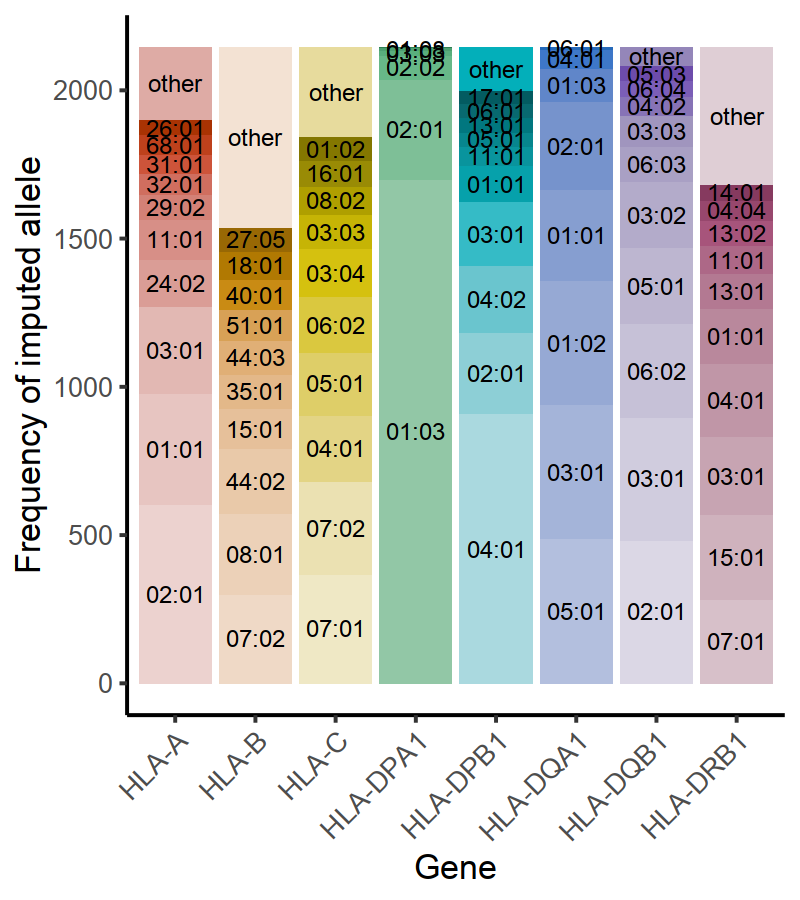

In [10]:
fig.size(4.5, 4)
pdf('HLA_allele_diversity.pdf', width = 4, height = 4.5)
p = results_df_agg %>% ggplot(aes(x = str_replace(gene, '_', '-'), y = x, fill = top_10)) +
    geom_bar(stat="identity") +
    theme_classic() + theme(legend.position = 'none') +
    scale_fill_manual(values = c(gene_colors_gradient)) +
    ylab('Frequency of imputed allele') + xlab('') + xlab('Gene') +
    theme(axis.text.x = element_text(size = 10)) + 
    theme(text = element_text(size=12)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
    geom_text(aes(label = gsub(".*\\*","",mylabel)), size = 3, position = position_stack(vjust = 0.5))
print(p)
dev.off()
p

## AMP2RA percent increase plot

null device 
          1

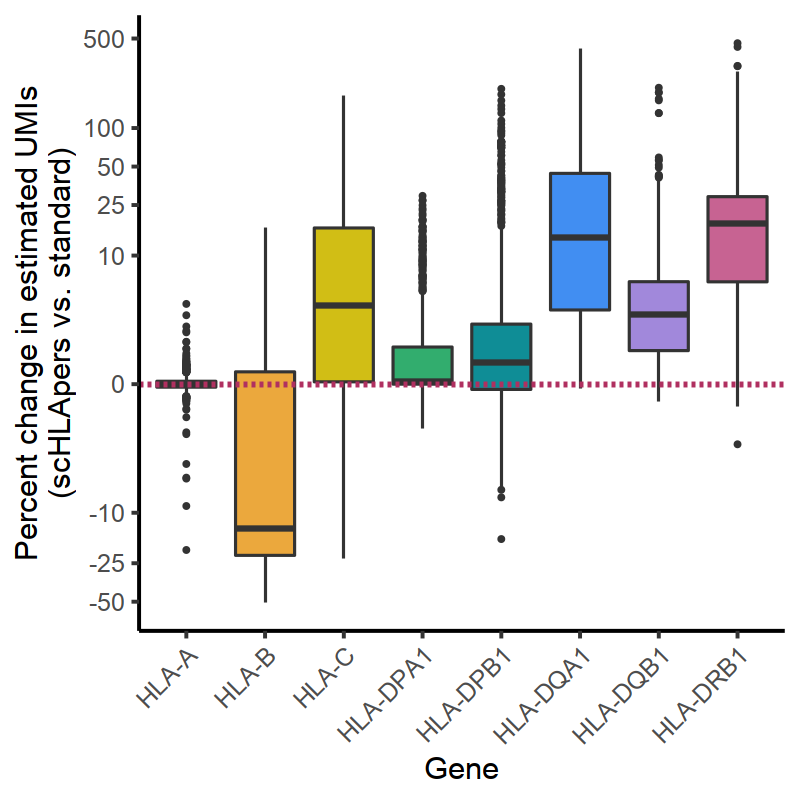

In [11]:
pct_inc_combined = readRDS('../scripts/2_expression/percent_change_results/pct_inc_combined.rds')

fig.size(4, 4)
#pdf(file = 'Compare_percent_change_AMP2RA.pdf', width = 4, height = 4)
p = pct_inc_combined %>% #filter(dataset == 'Synovium') %>%
    ggplot() +
    geom_boxplot(aes(x = gene, y = pct_change, fill = gene), outlier.size = 0.4, lwd = 0.4) + theme_bw() +
    xlab('Gene') + ylab('Percent change in estimated UMIs\n(scHLApers vs. standard)') + 
    theme_classic() + theme(legend.position = 'none') +
    scale_fill_manual(values = gene_colors) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), plot.title = element_text(size =11)) + 
    geom_hline(yintercept=0, color = 'maroon', size = 0.75, linetype = 'dashed') +
        scale_y_continuous(trans = pseudolog10_trans, 
                       breaks = c(-100, -50, -25, -10, 0, 10, 25, 50, 100, 500))
print(p)
dev.off()
p

In [12]:
pct_inc_combined %>% #filter(dataset == 'Synovium') %>% 
    group_by(gene) %>% dplyr::summarise(mean = mean(pct_change),
                                        median = median(pct_change),
                                        q25 = quantile(pct_change, probs = c(.25)),
                                        q75 = quantile(pct_change, probs = c(.75)))

gene,mean,median,q25,q75
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
HLA-A,-0.007353797,-0.002829143,-0.10792442,0.1033640
HLA-B,-12.248775543,-13.256041220,-21.68237897,0.4459972
HLA-C,11.145874155,3.873572390,0.08277418,16.5221782
HLA-DPA1,1.420368085,0.102459447,0.00000000,1.4357191
HLA-DPB1,5.605915782,0.783108887,-0.18990827,2.6029626
HLA-DQA1,27.211679640,13.860809531,3.53192478,44.2329776
HLA-DQB1,6.048627295,3.205701562,1.28035487,6.1513323
HLA-DRB1,22.872935460,17.788335872,6.13711277,29.0766038


## Plot percent change wrt # reference allele copies

We expect individuals homozygous for the reference alleles for a given gene to match standard pipeline

png 
  2

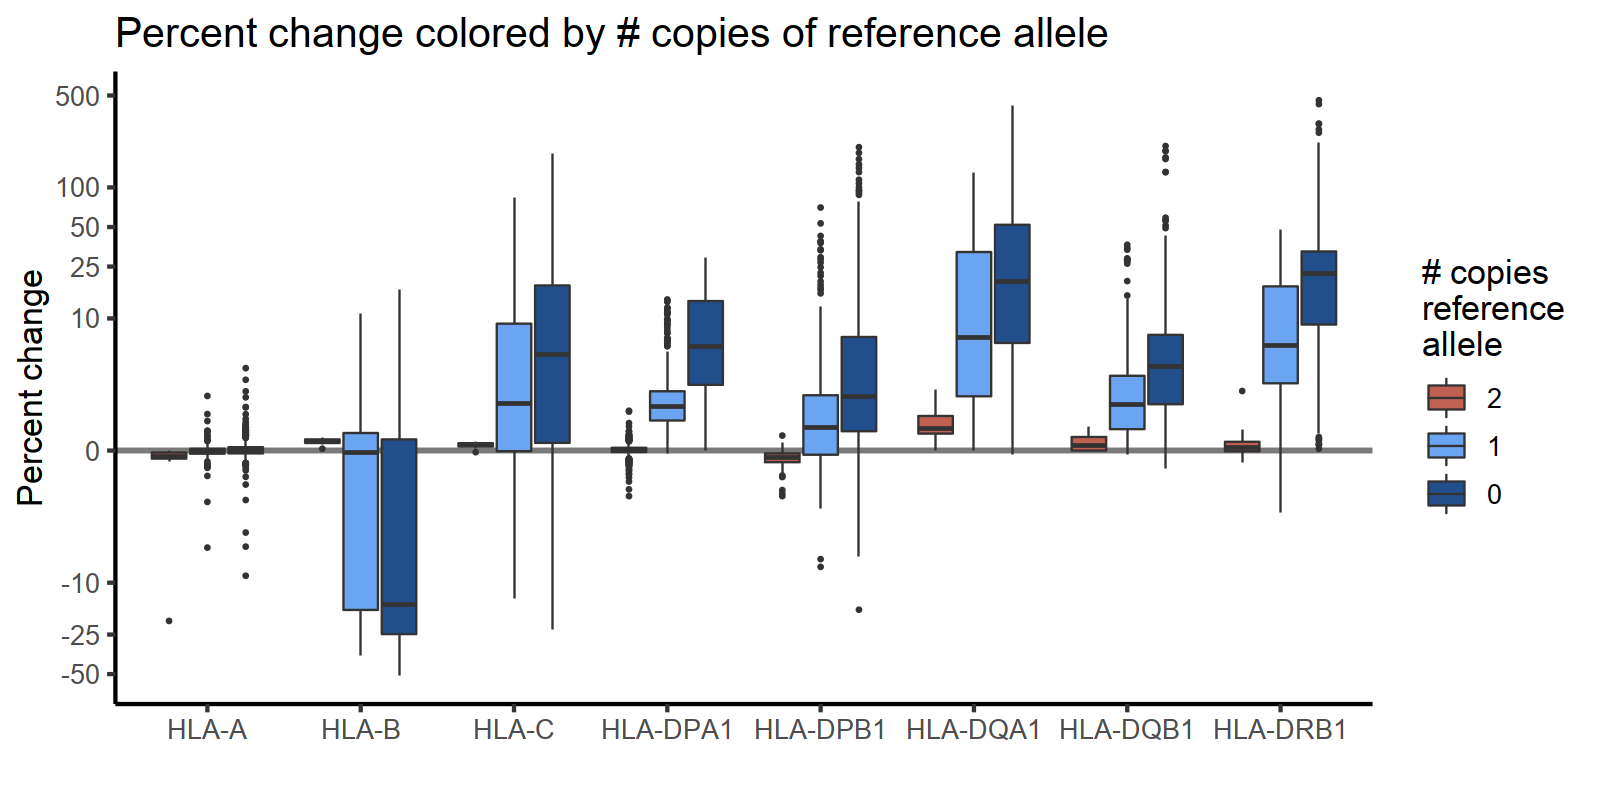

In [11]:
pct_inc_combined = readRDS('../scripts/2_expression/percent_change_results/pct_inc_combined.rds')
pct_inc_combined$gene = factor(pct_inc_combined$gene, 
    levels = c('HLA-A', 'HLA-B', 'HLA-C', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DQA1', 'HLA-DQB1', 'HLA-DRB1'))

myvals = c('#bf6052', '#6ba5f2', '#224f8c')

fig.size(4, 8)
pdf(file = 'Compare_percent_change_numCopiesRefAllele.pdf', width = 8, height = 4)
p = ggplot(pct_inc_combined) +
    geom_hline(yintercept=0, color = 'grey48', size = 0.75) +
    geom_boxplot(aes(x = gene, y =  pct_change, fill = fct_rev(factor(numRefAlleles))), 
                 outlier.size = 0.2, lwd = 0.3) +
    xlab('') + 
    ggtitle('Percent change colored by # copies of reference allele') + 
    ylab('Percent change') + 
    theme_classic(base_size = 12) + scale_fill_manual(values = myvals) +
        scale_y_continuous(trans = pseudolog10_trans, 
                       breaks = c(-100, -50, -25, -10, 0, 10, 25, 50, 100, 500)) +
    labs(fill = '# copies\nreference\nallele') +
    theme(axis.title.x=element_text(colour="black"))
print(p)
dev.off()
p

## % change vs. Levenshtein distance

In [14]:
df = read.csv('../scripts/2_expression/percent_change_results/Three_cohorts_percentChange_pileup.csv')
df$cohort = plyr::revalue(df$cohort, old_new_dataset_names)
df$cohort_factor = factor(df$cohort, levels = c('Synovium', 'PBMC-cultured', 'PBMC-blood'))

The following `from` values were not present in `x`: Smillie, Randolph_NI, Smillie2019, Randolph



Warning message:
“Ignoring unknown parameters: linewidth”
`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



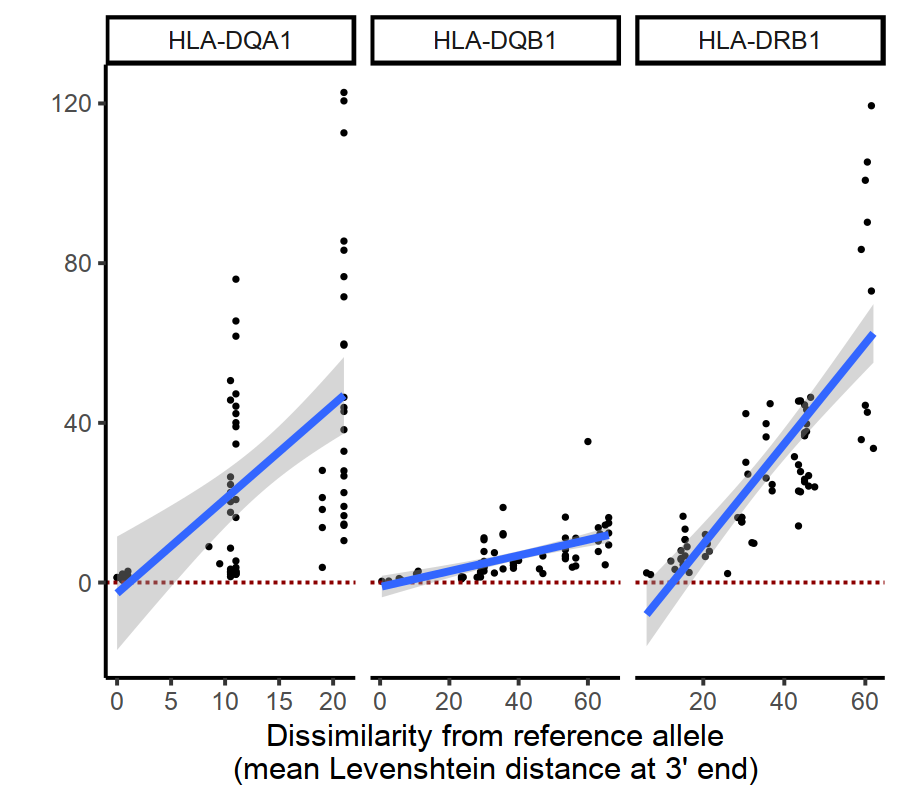

In [15]:
fig.size(4, 4.5)
## Add trendlines
pdf(file = 'Perc_change_v_Lev_dist_freey_trendOne_AMP2RA_2.pdf', width = 4.5, height = 4)
p = ggplot(sample_frac(df %>% filter(cohort %in% c('Synovium'), 
                                    gene %in% c('DQA1', 'DQB1', 'DRB1')), 1L)) +
    geom_point(aes(x = meanDist, y = percentChange), size = 0.3) +
    theme_classic() + 
    geom_hline(yintercept=0, linetype="dashed", color = "darkred") +
    facet_wrap(~ paste0('HLA-', gene), scales = 'free', ncol = 8) + 
    scale_color_manual(values = cohort_colors) + theme(legend.position = 'bottom') +
    ylab('') + 
    xlab('Dissimilarity from reference allele\n(mean Levenshtein distance at 3\' end)') +
    geom_smooth(aes(x = meanDist, y = percentChange), method=lm, linewidth = 1) +
    facet_wrap(~ paste0('HLA-', gene), ncol = 3, scale = 'free_x', strip.position = 'top')
    
print(p)
dev.off()
p

## Long and short read comparison

In [17]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(stringr)
    library(Matrix)
    library(Matrix.utils)
    library(singlecellmethods)
    library(dplyr)
    library(plyr)
    library(ggrastr)
    library(patchwork)
    library(ggpubr)
    library(reshape2) })

In [18]:
data = readRDS('../scripts/2_expression/Randolph_data_long_short.rds')

p1 = data %>% 
    ggplot(aes(x = noPers_longReads, y = noPers_shortReads)) + 
    geom_abline(intercept = 0, linetype = 'dashed', color = 'grey48') +
    geom_point(size = 1, shape = 1) + theme_classic() + facet_wrap(~Gene, ncol = 8, scales = 'free')+ 
    stat_cor(aes(label = ..r.label..), cor.coef.name = 'r', label.sep = '\n', col = 'blue', digits = 2) +
    xlab('Standard LongReads Mean logCP10k+1') + ylab('Standard ShortReads\nMean logCP10k+1')  

p2 = data %>% 
    ggplot(aes(x = Pers_longReads, y = Pers_shortReads)) + 
      geom_abline(intercept = 0, linetype = 'dashed', color = 'grey48') +
    geom_point(size = 1, shape = 1) + theme_classic() + facet_wrap(~Gene, ncol = 8, scales = 'free') + 
    stat_cor(aes(label = ..r.label..), cor.coef.name = 'r', label.sep = '\n', col = 'blue', digits = 2) +
    xlab('scHLApers LongReads Mean logCP10k+1') + ylab('scHLApers ShortReads\nMean logCP10k+1') +
    theme(strip.background = element_blank(), strip.text = element_blank())

png 
  2

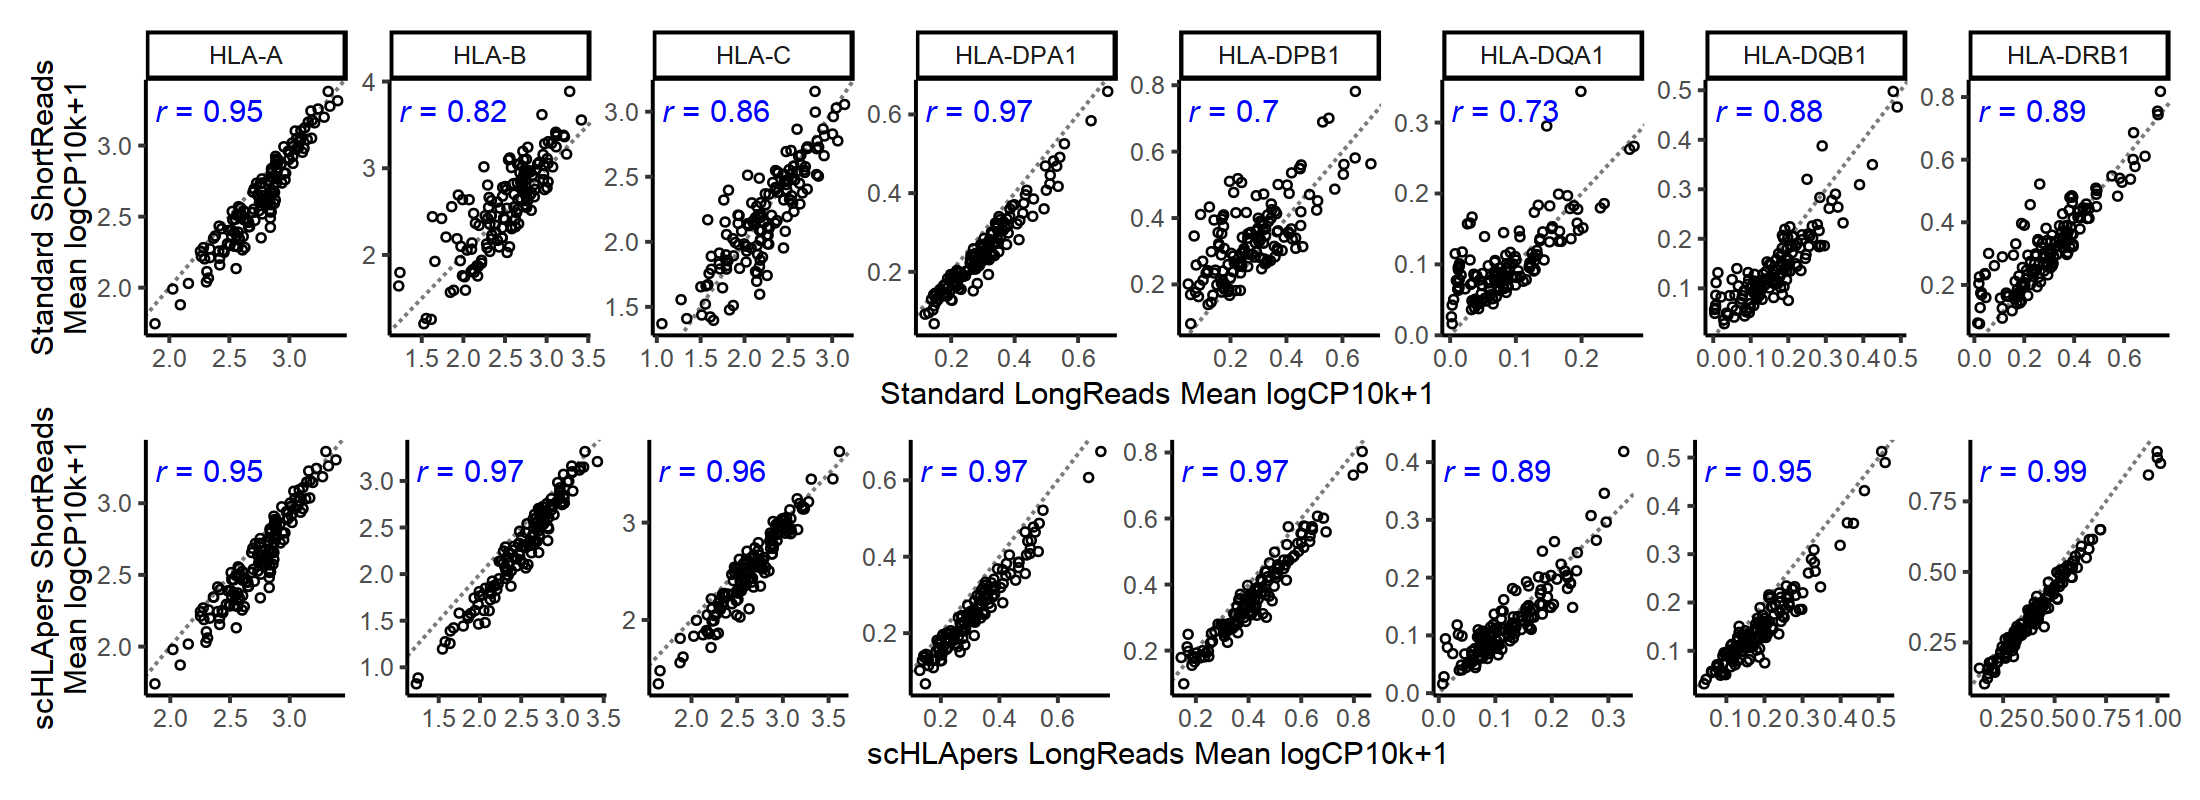

In [19]:
fig.size(4, 11)
pdf(file = paste0('Randolph_long_short_bySample.pdf'), width = 11, height = 4)
p = p1 / p2
print(p)
dev.off()
p

## Plot expression across cell types

In [3]:
B_plasma_ref = readRDS('../symphony/AllCohorts_B_plasma_sample0.5batch0.5dataset0.5_reference.rds')
B_plasma_HLA = B_plasma_ref$exp_norm_HLA
B_plasma_meta = cbind(B_plasma_ref$meta_data, t(as.matrix(B_plasma_ref$exp_norm_HLA)))
rm(B_plasma_ref)

Endothelial_ref = readRDS('../symphony/AllCohorts_Endothelial_sample0.5batch0.5dataset0.5_reference.rds')
Endothelial_HLA = Endothelial_ref$exp_norm_HLA
Endothelial_meta = cbind(Endothelial_ref$meta_data, t(as.matrix(Endothelial_ref$exp_norm_HLA)))
rm(Endothelial_ref)

Myeloid_ref = readRDS('../symphony/AllCohorts_Myeloid_sample0.5batch0.5dataset0.5_reference.rds')
Myeloid_HLA = Myeloid_ref$exp_norm_HLA
Myeloid_meta = cbind(Myeloid_ref$meta_data, t(as.matrix(Myeloid_ref$exp_norm_HLA)))
rm(Myeloid_ref)

NK_ref = readRDS('../symphony/AllCohorts_NK_sample0.5batch0.5dataset0.5_reference.rds')
NK_HLA = NK_ref$exp_norm_HLA
NK_meta = cbind(NK_ref$meta_data, t(as.matrix(NK_ref$exp_norm_HLA)))
rm(NK_ref)

T_ref = readRDS('../symphony/AllCohorts_T_sample0.5batch0.5dataset0.5_reference.rds')
T_HLA = T_ref$exp_norm_HLA
T_meta = cbind(T_ref$meta_data, t(as.matrix(T_ref$exp_norm_HLA)))
rm(T_ref)

Fibroblast_ref = readRDS('../symphony/AllCohorts_Fibroblast_sample0.5batch0.5dataset0.5_reference.rds')
Fibroblast_HLA = Fibroblast_ref$exp_norm_HLA
Fibroblast_meta = cbind(Fibroblast_ref$meta_data, t(as.matrix(Fibroblast_ref$exp_norm_HLA)))
rm(Fibroblast_ref)

combined_meta = rbind(B_plasma_meta, Endothelial_meta, Myeloid_meta, NK_meta, T_meta, Fibroblast_meta)

In [5]:
res_full = NULL
for (g in c('HLA-A', 'HLA-B', 'HLA-C', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DQA1', 'HLA-DQB1', 'HLA-DRB1')) {
    print(g)
    a = aggregate(combined_meta[, g], 
                  by = list(cluster = combined_meta$cell_type_major, dataset = combined_meta$dataset), FUN = mean)
    b = aggregate(combined_meta[, g], 
                  by = list(cluster = combined_meta$cell_type_major, dataset = combined_meta$dataset), FUN = function(c){ sum(c != 0) / length(c)} )
    res = cbind(a, b$x)
    res$gene = g
    colnames(res) = c('cluster', 'dataset', 'mean_expr', 'percent_expr', 'gene')
    res_full = rbind(res_full, res)
}
res_full = res_full %>% mutate(dataset = ifelse(dataset %in% c('Randolph'), 'Randolph2021', dataset))
res_full$cluster = factor(res_full$cluster, levels = c( 'Myeloid', 'B_plasma', 'T', 'NK', 'Fibroblast', 'Endothelial'))
res_full$dataset = factor(res_full$dataset, levels = rev(c('OneK1K', 'Randolph2021', 'Smillie2019', 'AMP2RA' )))
res_full$gene = factor(res_full$gene, levels = rev(c('HLA-A', 'HLA-B', 'HLA-C', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DQA1', 'HLA-DQB1', 'HLA-DRB1')))
table(combined_meta$cell_type_major)
levels(res_full$cluster)[2] = 'B' # B includes plasma
res_full$gene = factor(res_full$gene, levels = rev(paste0('HLA-', c('A', 'B', 'C', 'DPA1', 'DPB1', 'DQA1', 'DQB1', 'DRB1'))))
res_full$dataset = plyr::revalue(res_full$dataset, old_new_dataset_names)
res_full$dataset = factor(res_full$dataset, levels = c('Synovium', 'Intestine', 'PBMC-cultured', 'PBMC-blood'))

[1] "HLA-A"
[1] "HLA-B"
[1] "HLA-C"
[1] "HLA-DPA1"
[1] "HLA-DPB1"
[1] "HLA-DQA1"
[1] "HLA-DQB1"
[1] "HLA-DRB1"



   B_plasma Endothelial  Fibroblast     Myeloid          NK           T 
     180935       26300       82651      145090      125865      805389 

The following `from` values were not present in `x`: Smillie, Randolph_NI, Randolph



png 
  2

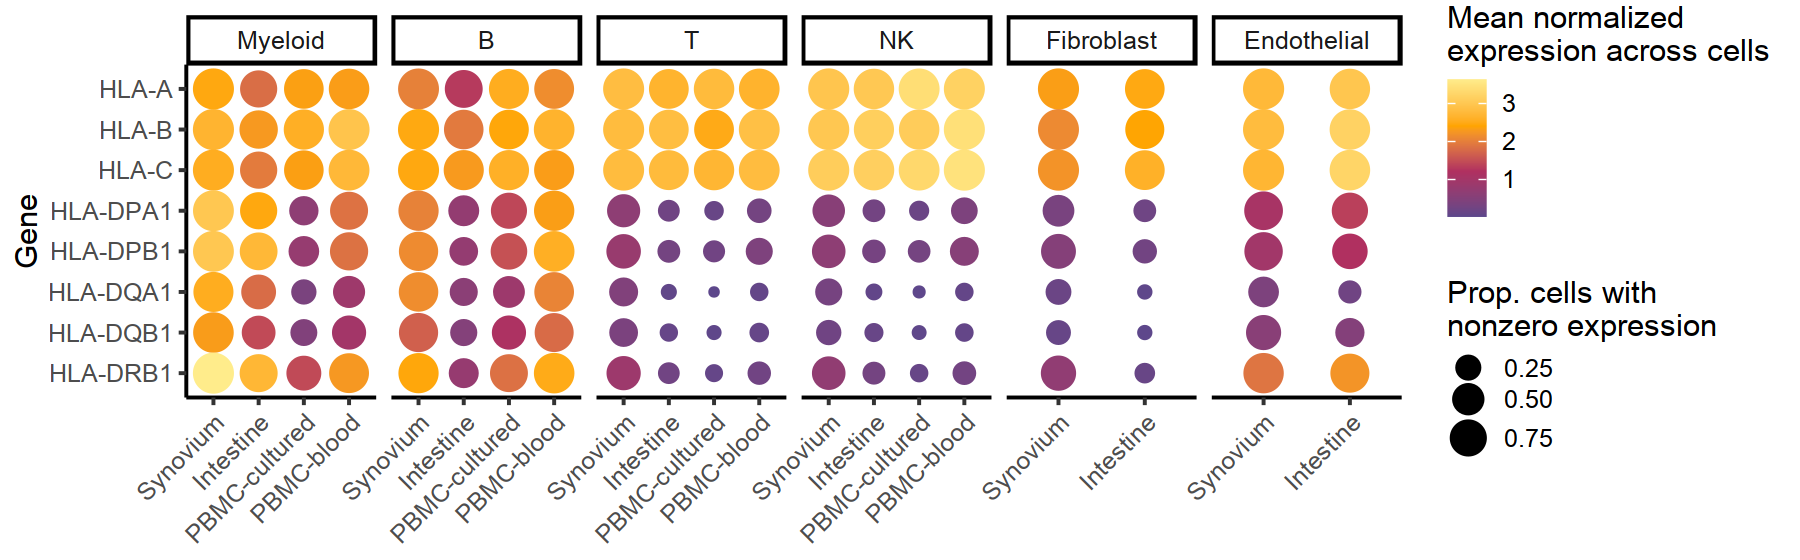

In [6]:
fig.size(2.8, 9)
pdf('Atlas_dotplot_major_cell_type.pdf', height=2.8, width=9, useDingbats = FALSE)
p = ggplot(res_full) +
    geom_point(aes(x = dataset, y = gene, size=percent_expr, color = mean_expr)) + theme_classic() +
    theme(axis.text.x=element_text(angle=45, hjust=1)) +
    facet_wrap(~cluster, ncol = 8, scales = 'free_x') +
    scale_color_gradientn(colours = c("mediumpurple4", "maroon", "orange", "lightgoldenrod1"), 
                              values = c(0, 0.33, 0.66, 1)) +
    xlab('Dataset') + ylab('Gene') + theme(legend.position = 'right') + 
    labs(size = 'Prop. cells with\nnonzero expression', col = 'Mean normalized\nexpression across cells') +
    theme(legend.key.height= unit(0.35, 'cm'),
        legend.key.width= unit(0.5, 'cm')) + xlab(NULL)
print(p)
dev.off()
p

# Done!

In [20]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server release 6.5 (Santiago)

Matrix products: default
BLAS/LAPACK: /PHShome/jbk37/anaconda3/envs/hla_new/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] reshape2_1.4.4          ggpubr_0.4.0            patchwork_1.1.1        
 [4] ggrastr_1.0.1           plyr_1.8.6              singlecellmethods_0.1.0
 [7] data.table_1.14.8       Matrix.utils_0.9.8      Matrix_1.4-0           
[10] ggallin_0.1.1           RColor